<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Cami%C3%B3n_de_transporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO 1

# Solución analítica

Se puede observar que el peso de las tinas tiene una función triangular: $\hspace{5mm}x_i\sim Tri(190,230,210)$

donde
$$   f(x) =  \left\{ \begin{array}{lcc}  \dfrac{(x-190)}{400} & si & 190 \leq x \leq 210 \\ \\ \dfrac{(230-x)}{400} & si & 210 \leq x \leq 230 \end{array} \right. $$

Además, esta función de densidad tiene la siguiente media y varianza:

$$\mu=E(x) =\dfrac{a+b+c}{3} =\dfrac{190+230+210}{3}=210$$

$$\sigma^2=VAR(x)=\dfrac{a^2+b^2+c^2-ab-bc-ac}{18}=\dfrac{190^2+230^2+210^2-(190)(230)-(230)(210)-(190)(210)}{18}=\dfrac{200}{3}$$

Se busca cacular la probabilidad del que peso de las 5 tinas sea mayor a 1000kg, es decir, se busca calcular:
$$P\left(\sum_{i=1}^5 x_i > 1000\right)$$

donde $x_i$ representa el peso de cada tina.

Recordando la siguiente propiedad del Teorema del Límite Central:

> *Cuando la población muestreada es aproximadamente simétrica, la distribución muestral de $\bar{x}$ se hace también aproximadamente normal para valores relativamente pequeños de $n$. (Mendehall p253)*

Por lo tanto, para poder aplicar el TLC,  se buca calcular:
$$P\left(\sum_i^5 x_i > 1000\right) = P(\bar{x} > 200) $$

luego

\begin{align*}
P(\bar{x} > 200) &= P(\bar{x}-\mu > 200 - \mu)\\
                    &= P \left( \dfrac{\bar{x}-\mu}{\sigma} \sqrt{n}> \dfrac{200-\mu}{\sigma} \sqrt{n}\right)\\
                    &= P\left( Z > \dfrac{200-\mu}{\sigma} \sqrt{5} \right)
\end{align*}

Sustituyendo valores

\begin{align*}
  P\left( Z > \dfrac{\bar{x}-\mu}{\sigma}\sqrt{5}\right)&=P\left( Z> \dfrac{200-210}{\sqrt{200/3}}\sqrt{5}\right)\\
  &=P(Z > -2.738)\\
  &=1-P(Z \leq -2.738)\\
  &=1-0.0031\\
  &=0.9969
\end{align*}


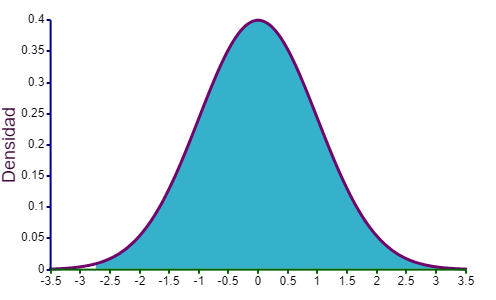

# Simulación
Se utiliza el método de la la función inversa, para ello se calcula la función de densidad acumulada y su inversa:

$$   F(x) \left\{ \begin{array}{lcc}   \dfrac{(x-190)^2}{800} & si & 190 \leq x \leq 210 \\ \\ \dfrac{(230-x)^2}{800} & si & 210 \leq x \leq 230 \end{array} \right.$$

Luego:
$$F^-1(U)= \left\{ \begin{array}{lcc}  \sqrt{U(800)}+190 & si & 0 \leq U \leq 0.5 \\ \\ 230-\sqrt{800(1-U)} & si & 0.5 \leq U \leq 1 \end{array} \right.$$


**CÓDIGO:**



Librerias:

In [ ]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

Muestra:

In [ ]:
j=0
lista=[]
for j in range(5):
  u=rnd.triangular(190,230)
  lista.append(u)
lista


[206.65540061836447,
 222.03587293756675,
 217.7776353657562,
 205.216909726416,
 217.4314979079816]

Experimento:

In [ ]:
#MUESTRA
j=0
lista=[]
for j in range(5):
  u=rnd.triangular(190,230)
  lista.append(u)
#CONDICIÓN
if suma > 1000:
  print("Peso excedido: ", suma ,"kg")

Peso excedido:  1058.8461827599529 kg


Corridas:

Text(0.5, 0, 'Peso (kg)')

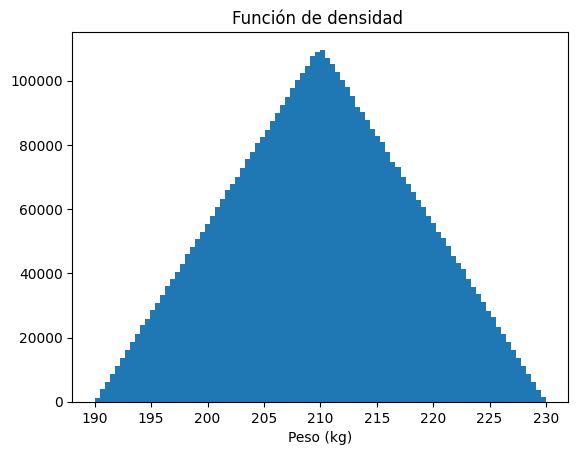

In [ ]:
  i=0
  contador=0
  lista1=[]
  lista2=[]
  n=1000000
  for i in range (n): #CORRIDAS
    j=0
    suma=0
    for j in range(5): #MUESTRA
      u=rnd.triangular(190,230)
      suma+=u
      lista1.append(u)
    if suma > 1000:  #CONDICIÓN
      contador+=1
      prob=contador/n
    lista2.append(contador/(i+1))
    #HISTOGRAMA (FUNCIÓN DE DENSIDAD)
plt.hist(lista1, bins=90)
plt.title('Función de densidad ')
plt.xlabel('Peso (kg)')

Simulación:

In [ ]:
def tina(n):
  i=0
  contador=0
  lista1=[]
  lista2=[]
  for i in range (n): #CORRIDAS
    j=0
    suma=0
    for j in range(5): #MUESTRA
      u=rnd.triangular(190,230)
      suma+=u
      lista1.append(u)
    if suma > 1000:  #CONDICIÓN
      contador+=1
      prob=contador/n
    lista2.append(contador/(i+1))

  print("Número de experimentos exitosos (kg total >1000): " , contador)
  print("Probabilidad de exceder 1000 kg: ", prob)

  plt.plot(lista2)
  return lista1,lista2

Número de experimentos exitosos (kg total >1000):  997583
Probabilidad de exceder 1000 kg:  0.997583


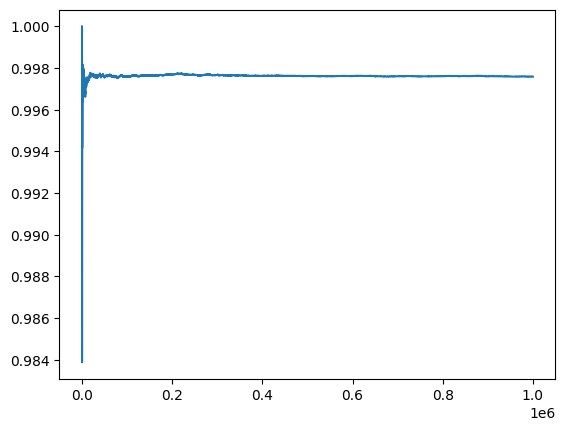

In [ ]:
lista1,lista2=tina(1000000)


# EJERCICIO 2

# Solución analítica

Primero se calcula en total de días al año que se transportaran las tinas:

$$5 \text{ días} \times 52\text{ semanas} = 260 \text{ días al año} $$

Luego, de los resultados del ejercicio 1, se sabe que la probabilidad de que se exceda el límite de peso (1000 kg) es $0.9969 \sim 0.997%$.
Se calcula entonces cuantos días año se espera que el peso se exceda:

\begin{matrix}
Días && Probabilidad\\\\
  260 \text{ días} & → & 1 \\
  x & → & 0.997\\\\
  & \therefore x=259 \text{ días}
\end{matrix}

Ya que se tiene que pagar un extra de $200 por cada día que se exceda la carga, el costo extra al año es

$$Costo=$200\times256=$51800$$

Ya que el costo del camión es de $60000, es decir, es mayor al costo extra, **se recomienda NO comprar el camión y pagar el costo de exceder la carga**




# SIMULACIÓN

In [161]:
def costo(n):
  i=0
  costo=0
  lista=[]
  cont=0
  for i in range (n): #CORRIDAS
    j=0
    contador=0
    suma=0
    for j in range(5): #MUESTRA
      u=rnd.triangular(190,230)
      suma+=u
    if suma > 1000:  #CONDICIÓN
      costo+=200
      cont+=1
    lista.append(costo)

  print("Número de días que se excedió la carga: ",cont)
  print("El costo total es: $" , costo)
  if costo < 60000:
    print("Se recomienda NO comprar el camión")
  else:
    print("Se recomienda SI comprar el camión")

  plt.plot(lista, label="Costo extra")
  plt.axhline(60000, color='r', linestyle='--', label="Costo del camión")
  plt.xlabel('Días')
  plt.ylabel('Costo')
  plt.title('Simulación de costos de tinas')
  plt.legend()

  return lista

Número de días que se excedió la carga:  259
El costo total es: $ 51800
Se recomienda NO comprar el camión


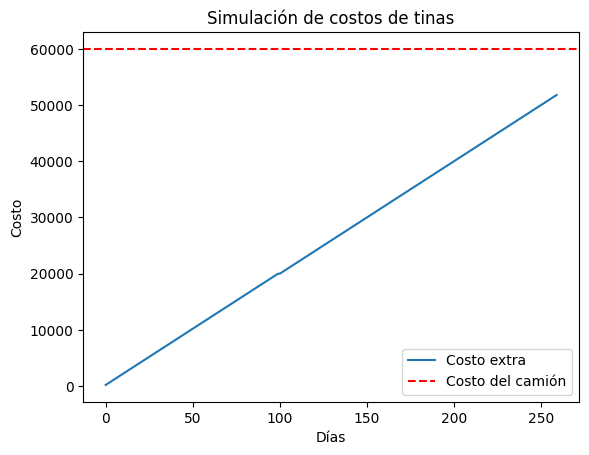

In [162]:
Ejer2=costo(260)